In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import json

# Flatten a nested list
def flatten_list(nested_list):
    flat_list = []
    for item in nested_list:
        if isinstance(item, list):
            flat_list.extend(flatten_list(item))  # Recursively flatten the nested lists
        else:
            flat_list.append(item.strip().lower())
    return flat_list

# Convert bounding box to image coordinates
def convert_bbox_format(bbox, image_width, image_height):
    x_min, y_min = bbox[0]
    x_max, y_max = bbox[1]
    # Convert normalized coordinates to pixel coordinates
    return ((x_min * image_width, y_min * image_height),
            (x_max * image_width, y_max * image_height))

# Function to check if two boxes overlap
def boxes_overlap(box1, box2):
    return not (box1[1][0] < box2[0][0] or  # Right of box1 is left of box2
                box1[0][0] > box2[1][0] or  # Left of box1 is right of box2
                box1[1][1] < box2[0][1] or  # Bottom of box1 is above box2
                box1[0][1] > box2[1][1])    # Top of box1 is below box2

# Visualize bounding boxes and retrieve overlapping words
def visualize_bounding_boxes(image_path, data, search_line):
    # Load the image
    image = Image.open(image_path)
    image_width, image_height = image.size

    fig, ax = plt.subplots(1)
    ax.imshow(image)

    found_lines = []
    foundWords = []

    # Iterate over lines
    for line in data["lines"]:
        line_text = ' '.join([word["value"] for word in line["words"]]).strip().lower()

        if search_line.lower() in line_text:
            found_lines.append(line)  # Store found line details

            try:
                # Convert bounding box for the matching line
                bbox = convert_bbox_format(line["geometry"], image_width, image_height)
                (x_min, y_min), (x_max, y_max) = bbox

                # Draw the original bounding box
                rect = patches.Rectangle((x_min, y_min), x_max - x_min, y_max - y_min,
                                         linewidth=1, edgecolor='r', facecolor='none')
                ax.add_patch(rect)
                plt.text(x_min, y_min, line_text, color='red', fontsize=12, weight='bold')

                # Create a larger box to capture more words in all directions
                margin = 40  # Margin to expand the box around the word
                expanded_rect = patches.Rectangle((x_min - margin, y_min - margin),
                                                  (x_max - x_min) + 2 * margin,
                                                  (y_max - y_min) + 2 * margin,
                                                  linewidth=1, edgecolor='b', facecolor='none')
                ax.add_patch(expanded_rect)

                overlapping_words = []
                # Check for overlapping words in the expanded area
                for other_line in data["lines"]:
                    for other_word in other_line["words"]:
                        other_bbox = convert_bbox_format(other_word["geometry"], image_width, image_height)
                        if boxes_overlap(other_bbox, ((x_min - margin, y_min - margin),
                                                      (x_max + margin, y_max + margin))):
                            overlapping_words.append(other_word["value"])
                            plt.text(other_bbox[0][0], other_bbox[0][1], other_word["value"], color='blue', fontsize=10)

                foundWords.append(overlapping_words)
            except ValueError as e:
                print(e)

    if not found_lines:
        print(f"No lines found containing the text: {search_line}")
    plt.show()
    return flatten_list(foundWords)

def LineWords(filename, line):
    # Load the data
    with open("data.json") as f:
        data = json.load(f)["pages"][0]["blocks"][0]

    # Provide the path to your image and search for "buyer details"
    image_path = filename
    return visualize_bounding_boxes(image_path, data, search_line=line)

# Main function to test the updated code
def main():
    with open("data.json") as f:
        data = json.load(f)["pages"][0]["blocks"][0]

    # Path to your image
    image_path = "document 4.png"  # Updated path to the image you uploaded
    print(visualize_bounding_boxes(image_path, data, search_line="invoice number"))

main()

In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import json

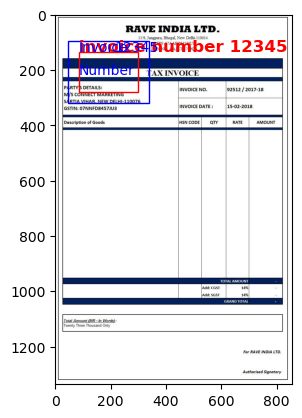

['invoice', 'number', '12345']


In [4]:
# Flatten a nested list
def flatten_list(nested_list):
    flat_list = []
    for item in nested_list:
        if isinstance(item, list):
            flat_list.extend(flatten_list(item))  # Recursively flatten the nested lists
        else:
            flat_list.append(item.strip().lower())
    return flat_list

# Convert bounding box to image coordinates
def convert_bbox_format(bbox, image_width, image_height):
    x_min, y_min = bbox[0]
    x_max, y_max = bbox[1]
    # Convert normalized coordinates to pixel coordinates
    return ((x_min * image_width, y_min * image_height),
            (x_max * image_width, y_max * image_height))

# Function to check if two boxes overlap
def boxes_overlap(box1, box2):
    return not (box1[1][0] < box2[0][0] or  # Right of box1 is left of box2
                box1[0][0] > box2[1][0] or  # Left of box1 is right of box2
                box1[1][1] < box2[0][1] or  # Bottom of box1 is above box2
                box1[0][1] > box2[1][1])    # Top of box1 is below box2

# Visualize bounding boxes and retrieve overlapping words
def visualize_bounding_boxes(image_path, data, search_line):
    # Load the image
    image = Image.open(image_path)
    image_width, image_height = image.size

    fig, ax = plt.subplots(1)
    ax.imshow(image)

    found_lines = []
    foundWords = []

    # Iterate over lines
    for line in data["lines"]:
        line_text = ' '.join([word["value"] for word in line["words"]]).strip().lower()

        if search_line.lower() in line_text:
            found_lines.append(line)  # Store found line details

            try:
                # Convert bounding box for the matching line
                bbox = convert_bbox_format(line["geometry"], image_width, image_height)
                (x_min, y_min), (x_max, y_max) = bbox

                # Draw the original bounding box
                rect = patches.Rectangle((x_min, y_min), x_max - x_min, y_max - y_min,
                                         linewidth=1, edgecolor='r', facecolor='none')
                ax.add_patch(rect)
                plt.text(x_min, y_min, line_text, color='red', fontsize=12, weight='bold')

                # Create a larger box to capture more words in all directions
                margin = 40  # Margin to expand the box around the word
                expanded_rect = patches.Rectangle((x_min - margin, y_min - margin),
                                                  (x_max - x_min) + 2 * margin,
                                                  (y_max - y_min) + 2 * margin,
                                                  linewidth=1, edgecolor='b', facecolor='none')
                ax.add_patch(expanded_rect)

                overlapping_words = []
                # Check for overlapping words in the expanded area
                for other_line in data["lines"]:
                    for other_word in other_line["words"]:
                        other_bbox = convert_bbox_format(other_word["geometry"], image_width, image_height)
                        if boxes_overlap(other_bbox, ((x_min - margin, y_min - margin),
                                                      (x_max + margin, y_max + margin))):
                            overlapping_words.append(other_word["value"])
                            plt.text(other_bbox[0][0], other_bbox[0][1], other_word["value"], color='blue', fontsize=10)

                foundWords.append(overlapping_words)
            except ValueError as e:
                print(e)

    if not found_lines:
        print(f"No lines found containing the text: {search_line}")
    plt.show()
    return flatten_list(foundWords)

def LineWords(filename, line):
    # Load the data
    with open("data.json") as f:
        data = json.load(f)["pages"][0]["blocks"][0]

    # Provide the path to your image and search for "buyer details"
    image_path = filename
    return visualize_bounding_boxes(image_path, data, search_line=line)

# Main function to test the updated code
def main():
    with open("data.json") as f:
        data = json.load(f)["pages"][0]["blocks"][0]

    # Path to your image
    image_path = "testocr3.jpg"  # Updated path to the image you uploaded
    print(visualize_bounding_boxes(image_path, data, search_line="invoice number"))

main()